# TASK 1
## 1. Parse Available Datasets:
### 1.1. Write a Python script that retrieves a list of all books with the title “lord of the rings” from the below API: https://openlibrary.org/dev/docs/api/search
### 1.2. Parse the response from the API and write the names of the books to a dataset.
### 1.3. Add 4 other columns showing data from the response

In [58]:
# Importing necessaries libraries
import requests
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### I defined a function that takes a URL and parameters to retrieve the information.
#### I wrote another function to take the list of books retrieved from the first function and the list of columns of interest to output a cleaned up information source.
#### After retrieving the books from the website and removing the unnecessary columns, the thrid function records them into a csv file. The fourth functions reads it.

In [31]:
# ISSUES:
# only gets 100 replies back

# MODIFICATIONS:
# write only the names to the dataset
# then add 4 other columns to the dataset

# No need to keep unnecessary columns in df
# make legends for the graphs, name them and name the axes (and lines?)

In [127]:
def get_book_list(URL:str, params:dict):
    response = requests.get(f'{URL}', params=params).json()
    return response['docs']
    # Returns a list of dictionaries, each being one book from the website's result.

# def get_book_name(book_list: list):
#     book_name_list = []
#     for name in book_list:
#         book_name_list.append(name['title'])
#     return book_name_list

def get_book_info(book_list:list, columns_of_interest:list):
    book_list_selected = []
    for book in book_list:
        book_dict = {}
        for column in columns_of_interest:
            # Since some entries may be missing in the column of interest, I used "try-except" to avoid errors.
            try:
                book_dict[column] = book[column]
            except KeyError as e:
                book_dict[column] = ''
                continue
        book_list_selected.append(book_dict)
    return book_list_selected
    # Returns a list of dictionaries with only columns necessary for our need.

def create_csv(file_name:str, cleanedup_list):
    with open(f'{file_name}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=cleanedup_list[0].keys())
        writer.writeheader()
        for book in cleanedup_list:
            writer.writerow(book)
        return book

def read_csv(file_name):
    file = pd.read_csv(f'{file_name}.csv')
    return file

In [28]:
lotr_all = get_book_list('https://openlibrary.org/search.json', {'title':"lord of the rings"})
lotr_all

[{'author_alternative_name': ['J R R Tolkien',
   'J. R.R. Tolkien',
   'J. R. R. Tolkien',
   'John R. R. Tolkien',
   'Tolkien',
   'Yue Han Luo Na De Rui Er Tuo Er Jin',
   'Dzhon R. R. Tolkin',
   'John Ronald Reuel Tolkien',
   'J.R.R.Tolkien'],
  'author_key': ['OL26320A'],
  'author_name': ['J.R.R. Tolkien'],
  'contributor': ['Rob Inglis (Narrator, Reader)',
   'Rob Inglis (Narrator)',
   'Lee, Alan.',
   'Dramatization (Narrator)',
   'Ian Holm (Narrator)',
   'Brian Sibley (Narrator)',
   'Lee, Alan, 1947-',
   'Tanaka, Akiko.',
   'Kořínek, Otakar, 1946-',
   'Seta, Teiji, 1916-',
   'Tolkien, J. R. R. 1892-1973.'],
  'cover_edition_key': 'OL51694024M',
  'cover_i': 14625765,
  'ddc': ['823.91', '823.912', '823.914'],
  'ebook_access': 'printdisabled',
  'ebook_count_i': 24,
  'edition_count': 250,
  'edition_key': ['OL43140390M',
   'OL31403985M',
   'OL47181069M',
   'OL46534010M',
   'OL48608497M',
   'OL45050302M',
   'OL33006725M',
   'OL42871495M',
   'OL37871183M',
  

In [29]:
lotr_cleaned = get_book_info(lotr_all, ['title', 'publisher', 'publish_year', 'language', 'isbn'])
lotr_cleaned

[{'title': 'The Lord of the Rings',
  'publisher': ['Houghton Mifflin Harcourt Publishing Company',
   'William Morrow Paperbacks',
   'Metis Yayıncılık',
   'European Schoolbooks',
   'Book Club Associates',
   'BBD Audio Publishing',
   'Zondervan',
   'HarperCollins Publishers',
   'Brand: Mariner Books',
   'Mariner Books',
   'Slovart',
   'Houghton Mifflin Harcourt Trade & Reference Publishers',
   'Hör Verlag, München',
   'Azbuka Klassika',
   'French and European Publications Inc',
   'Planeta Publishing',
   'HarperCollins',
   'George Allen & Unwin Ltd.',
   'Brand: Recorded Books',
   'Houghton Mifflin',
   'Kont͡sern "Olimp"',
   'Soundelux Audio Publishing',
   'Unieboek | Het Spectrum',
   'Allenand Unwin',
   'Highbridge Audio',
   'Klett-Cotta Verlag',
   'Unwin Paperbacks',
   'SP Interprint',
   '"Terra"',
   'HARPERCOLLINS PUBLISHERS',
   'Booket',
   'POCKET',
   'BBC Audiobooks',
   'Caedmon',
   'Klett-Cotta',
   'MINOTAURO',
   'Book Club Association',
   'Georg

In [51]:
create_csv('lotr', lotr_cleaned)
read_csv('lotr')

,title,publisher,publish_year,language,isbn
0,The Lord of the Rings,['Houghton Mifflin Harcourt Publishing Company...,"[1954, 1965, 1966, 1967, 1968, 1969, 1970, 197...","['spa', 'bul', 'tur', 'jpn', 'rus', 'ita', 'sw...","['3608939849', '0898452236', '0048230464', '22..."
1,Novels (Hobbit / Lord of the Rings),"['Highbridge Audio', 'Mariner Books', 'HarperC...","[1984, 1986, 2020, 1988, 1997, 1999, 2000, 200...","['eng', 'rus']","['9781565117075', '9780395282632', '0008112835..."
2,The lord of the rings,"['Mariner Books', 'Houghton Mifflin Company', ...","[2001, 2002]",['eng'],"['0618260226', '9781417605101', '0618195599', ..."
3,The Lord of the Ring,"['Regal Books', 'Muddy Pearl', 'Kingsway Publi...","[2021, 2006, 2007]",['eng'],"['1910012335', '9781842913260', '1842913263', ..."
4,Lord of the Rings,['Cedco Publishing Company'],"[2001, 2002, 2005]",['eng'],"['9780768325232', '0768325234', '9780768325782..."
...,...,...,...,...,...
95,Lord of the Rings the Fellowship of the Ring S...,['Independently Published'],[2022],['eng'],['9798839074279']
96,Finding God in the Lord of the Rings,"['Tyndale House Publishers', 'Tyndale Momentum...","[2003, 2021]",['eng'],"['9781496447517', '1496447506', '9781496447487..."
97,Lord of the Rings,"['Wallflower Press', 'WALLFLOWER']",[2006],"['und', 'eng']","['9781904764823', '1904764835', '9781904764830..."
98,Lord of the Rings Handbook : Everything You Ne...,['Independently Published'],[2021],['eng'],['9798774588732']


# TASK 2
## 2. Retrieve a Specific Dataset:
### 2.1. Using any of the other API’s available in the above link, construct a dataset using a query that you have put together and fetched data for via the API. 
### Use the examples listed as guidance on how to construct these queries

In [43]:
url = 'https://openlibrary.org/search.json'
subject_scifi = 'Science Fiction'.lower()
sort = 'rating'
params_top_scifi = {'subject':subject_scifi, 'sort':sort}

top_scifi_list = get_book_list(url, params_top_scifi)
top_scifi_list

[{'author_alternative_name': ['DOUGLAS ADAMS', 'Adams Douglas'],
  'author_key': ['OL272947A'],
  'author_name': ['Douglas Adams'],
  'contributor': ['Yao, Xianghui',
   'Harmony Books (Firm)',
   'Stephen Moore (Narrator)',
   'Serra, Laura, translator',
   'Dalkir, Serhat.',
   'Adams, Douglas, 1952-',
   'Ding, Shijia.'],
  'cover_edition_key': 'OL17837787M',
  'cover_i': 12986869,
  'ddc': ['823.914', '823.91408'],
  'ebook_access': 'borrowable',
  'ebook_count_i': 24,
  'edition_count': 116,
  'edition_key': ['OL47310781M',
   'OL49952327M',
   'OL47487775M',
   'OL40434146M',
   'OL41021230M',
   'OL46566468M',
   'OL47127697M',
   'OL45971392M',
   'OL39224030M',
   'OL35624338M',
   'OL35365721M',
   'OL35410061M',
   'OL38565035M',
   'OL36625039M',
   'OL37764474M',
   'OL34431154M',
   'OL34809381M',
   'OL34810135M',
   'OL34817728M',
   'OL34820809M',
   'OL35094685M',
   'OL32856776M',
   'OL30547883M',
   'OL32063273M',
   'OL30554724M',
   'OL32120409M',
   'OL31979069M

In [52]:
columns_needed = ['title', 'format', 'author_name', 'subject', 'publish_year', 'language', 'first_publish_year', 'ratings_count', 'ratings_average']
top_scifi_cleaned = get_book_info(top_scifi_list, columns_needed)
create_csv('top_scifi', top_scifi_cleaned)
read_csv('top_scifi')

,title,format,author_name,subject,publish_year,language,first_publish_year,ratings_count,ratings_average
0,The Hitch Hiker's Guide to the Galaxy,"['audio cd', 'dvd-rom', 'Audiobook', 'paperbac...",['Douglas Adams'],"['comic science fiction', 'Vogons', 'Humorous ...","[1979, 1980, 1981, 1982, 1983, 1984, 1985, 198...","['spa', 'ger', 'ita', 'cze', 'eng', 'chi', 'fr...",1979,129,4.519380
1,Bumi manusia,"['Paperback', 'hardcover', 'Bumi manusia', 'Mi...","['Pramoedya Ananta Toer', 'Pramoedya Ananta To...","['Young men', 'Fiction', 'History', 'New York ...","[1991, 1993, 1996, 1972, 1980, 1982, 1983]","['dut', 'eng', 'ind']",1972,36,4.750000
2,Six of Crows,"['Hardcover', 'perfect paperback', 'ebook', 'm...",['Leigh Bardugo'],"['Young adult fiction', 'Fantasy fiction', 'Fi...","[2016, 2017, 2018, 2019, 2021, 2022, 2023, 200...","['eng', 'ger']",2001,66,4.590909
3,The Martian,"['audio cd', 'library binding', 'pocket book',...",['Andy Weir'],"['Science-Fiction', 'Science Fiction & Fantasy...","[2016, 2017, 2018, 2019, 2020, 2021, 2011, 201...","['spa', 'chi', 'ind', 'ger', 'rum', 'kor', 'fr...",2011,275,4.381818
4,Project Hail Mary,"['audio cd', 'perfect paperback', 'Audiobook',...",['Andy Weir'],"['hard science-fiction', 'science-fiction', 's...","[2021, 2022, 2023]","['eng', 'ger']",2021,94,4.468085
...,...,...,...,...,...,...,...,...,...
95,Snow Crash,"['mp3 cd', 'Hardcover', 'Mass Market Paperback...","['Neal Stephenson', 'Juanma Barranquero']","['American Science fiction', 'Open Library Sta...","[1992, 1993, 1994, 1995, 1999, 2000, 2001, 200...","['ger', 'fre', 'por', 'eng', 'ita']",1992,169,4.035503
96,Do Androids Dream of Electric Sheep?,"['audio cd', 'library binding', 'Hardcover', '...",['Philip K. Dick'],"['Androids', 'Fiction', 'Rick Deckard (Fictiti...","[1968, 1969, 1971, 1972, 1975, 1976, 1982, 198...","['chi', 'spa', 'heb', 'ger', 'fre', 'tur', 'jp...",1968,140,4.028572
97,Dream Country,"['Hardcover', 'Unknown Binding', 'Paperback', ...","['Neil Gaiman', 'Jill Thompson', 'Bryan Talbot']","['Horror comic books, strips', 'Literature', '...","[2017, 2018, 2021, 2022, 1991, 1995, 1997, 199...","['eng', 'fre']",1991,36,4.305555
98,"The Lion, the Witch and the Wardrobe","['School & Library Binding', 'audio cd', 'pape...",['C.S. Lewis'],"['the Blitz', 'fauns', 'Turkish Delight', 'lio...","[1950, 1959, 1965, 1968, 1969, 1970, 1972, 197...","['spa', 'jpn', 'wel', 'chi', 'dan', 'ita', 'ru...",1950,103,4.126214


# TASK 3
## 3. Brief Dataset Exploration:
### 3.1. Explore the data you collected in step 2 and produce some interesting insights in the data found including any charts/graphs/tables.

In [61]:
# I decided to:
## relative rating overtime based on the book's original release date
## number of translations over time based on the book's original release date
## overlap to see:
#### correlation between relative rating (popularity) overtime (of the genre) vs number of translations

In [106]:
df_top_scifi_sorted = read_csv('top_scifi')

df_top_scifi_sorted['relative_ratings'] = df_top_scifi_sorted['ratings_average']/df_top_scifi_sorted['ratings_count']
df_top_scifi_sorted['language'] = df_top_scifi_sorted['language'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_top_scifi_sorted['lan_num'] = df_top_scifi_sorted['language'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_top_scifi_sorted_lan = df_top_scifi_sorted.sort_values(by=['lan_num'], ascending=False)
df_top_scifi_sorted_lan

,title,format,author_name,subject,publish_year,language,first_publish_year,ratings_count,ratings_average,relative_ratings,lan_num
15,Harry Potter and the Philosopher's Stone,"['Audio Cassette', 'Turtleback', 'Taschenbuch'...",['J. K. Rowling'],"['Ghosts', 'Monsters', 'Vampires', 'Witches', ...","[1997, 1998, 1999, 2000, 2001, 2002, 2003, 200...","[ger, fin, wel, rus, tur, hin, tha, swe, gre, ...",1997,731,4.250342,0.005814,46
8,Harry Potter and the Prisoner of Azkaban,"['Audio cassette', 'hardcover', 'Digital Audio...",['J. K. Rowling'],"['Fantasy fiction', 'orphans', 'foster homes',...","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...","[ita, ara, tib, pol, nob, heb, tha, kor, spa, ...",1999,505,4.302970,0.008521,33
45,Animal Farm,"['Audio Cassette', 'Taschenbuch', 'hardcover',...",['George Orwell'],['British and irish fiction (fictional works b...,"[1945, 1946, 1947, 1948, 1949, 1950, 1951, 195...","[ger, mal, yid, hun, rus, tur, swe, gre, cat, ...",1945,443,4.085779,0.009223,31
12,The Hobbit,"['Leather-bound', 'product bundle', 'Audio Cas...",['J.R.R. Tolkien'],"['Arkenstone', 'Battle of Five Armies', 'invis...","[2050, 1937, 1938, 1946, 1951, 1956, 1957, 196...","[ger, yid, fin, rus, tur, swe, lat, cat, cor, ...",1937,417,4.270983,0.010242,29
9,The Two Towers,"['Audio Cassette', 'Trade Paperback', 'hardcov...",['J.R.R. Tolkien'],"['Ents', 'Orcs', 'hobbits', 'magic', 'Ficción ...","[1954, 1955, 1960, 1962, 1963, 1965, 1966, 196...","[ast, ger, yid, rus, tur, swe, cat, dut, eng, ...",1954,192,4.354166,0.022678,24
...,...,...,...,...,...,...,...,...,...,...,...
89,Rogue protocol,"['audio cd', 'Paperback']",['Martha Wells'],"['Fiction', 'Androids', 'Human-computer intera...",[2018],[eng],2018,61,4.147541,0.067992,1
13,Stories of Your Life and Others,"['Trade paperback', 'mp3 cd', 'Paperback', 'pa...",['Ted Chiang'],"['American Science fiction', 'Fiction, science...","[2016, 2017, 2019, 2024, 2002, 2005, 2010, 201...",[eng],2002,74,4.418919,0.059715,1
46,The Vampire Diaries,['Paperback'],['Lisa Jane Smith'],"[""Children's Books -- Literature -- Popular Cu...",[2009],NaN,2009,15,4.866667,0.324444,0
86,Uprooted,"['paperback', 'hardcover']",['Naomi Novik'],"['Young women', 'Wizards', 'Friendship', 'Fict...","[2016, 2015]",NaN,2015,43,4.255814,0.098972,0


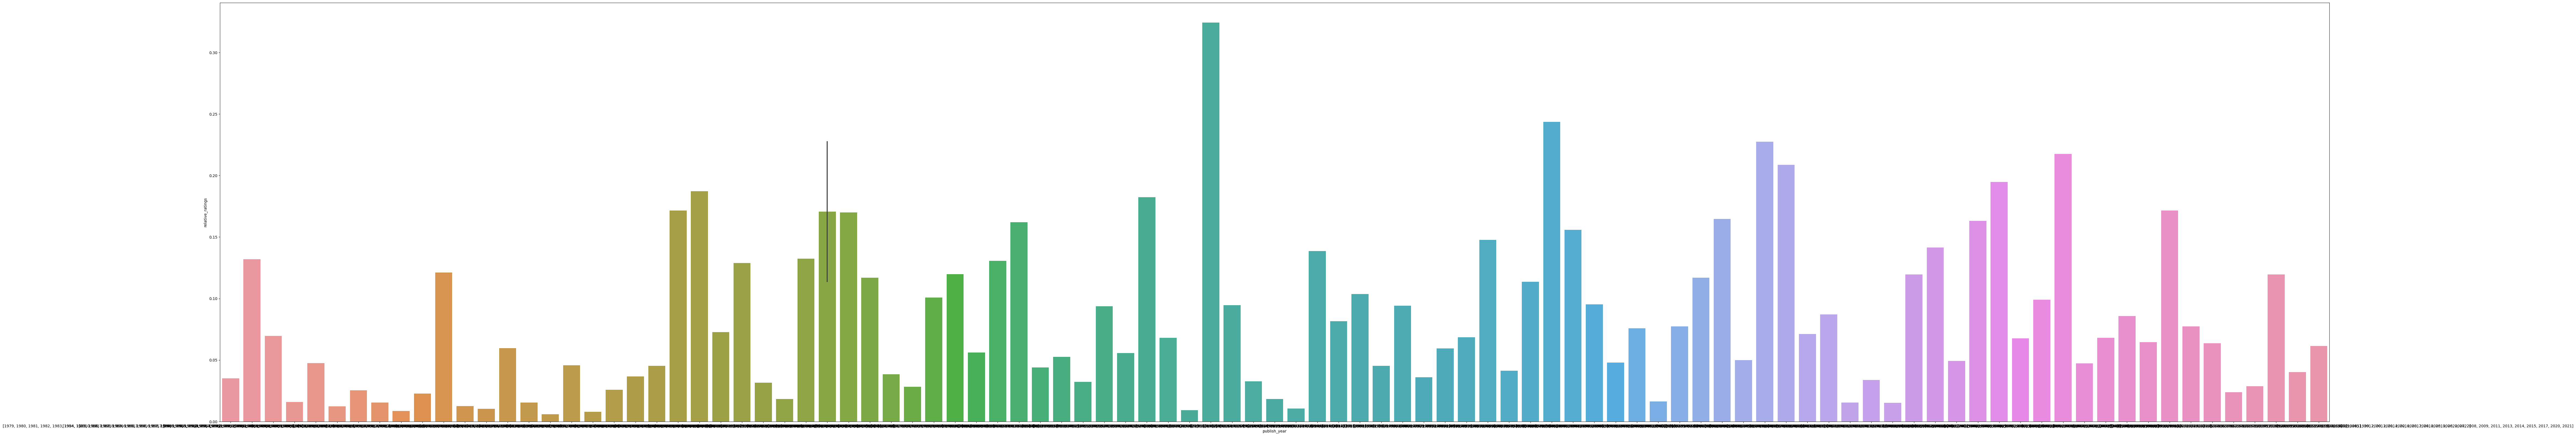

In [107]:
df_exploded_year = df_top_scifi_sorted.explode('publish_year').reset_index(drop=True)
df_exploded_year

fig, ax = plt.subplots(figsize=(100, 20))

sns.barplot(data=df_exploded_year, x='publish_year', y='relative_ratings', ax=ax)
plt.show()

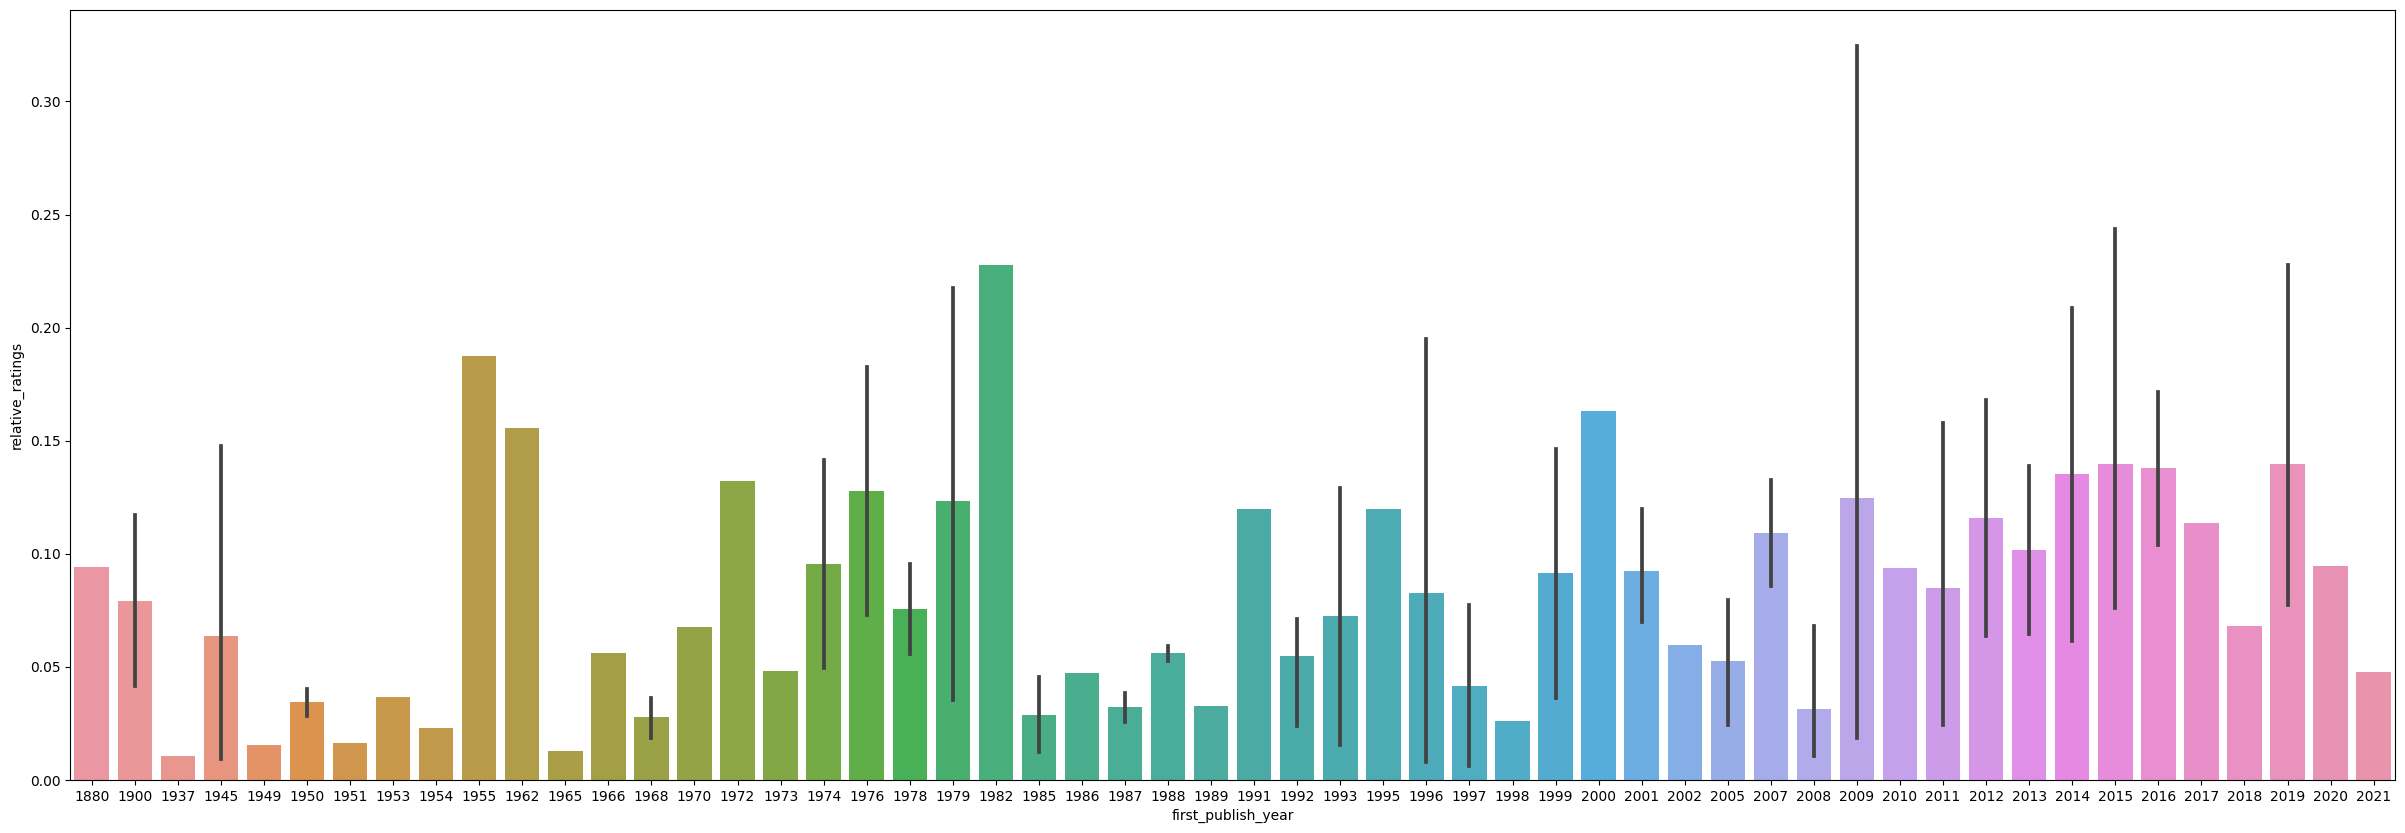

In [109]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.barplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax)
plt.show()

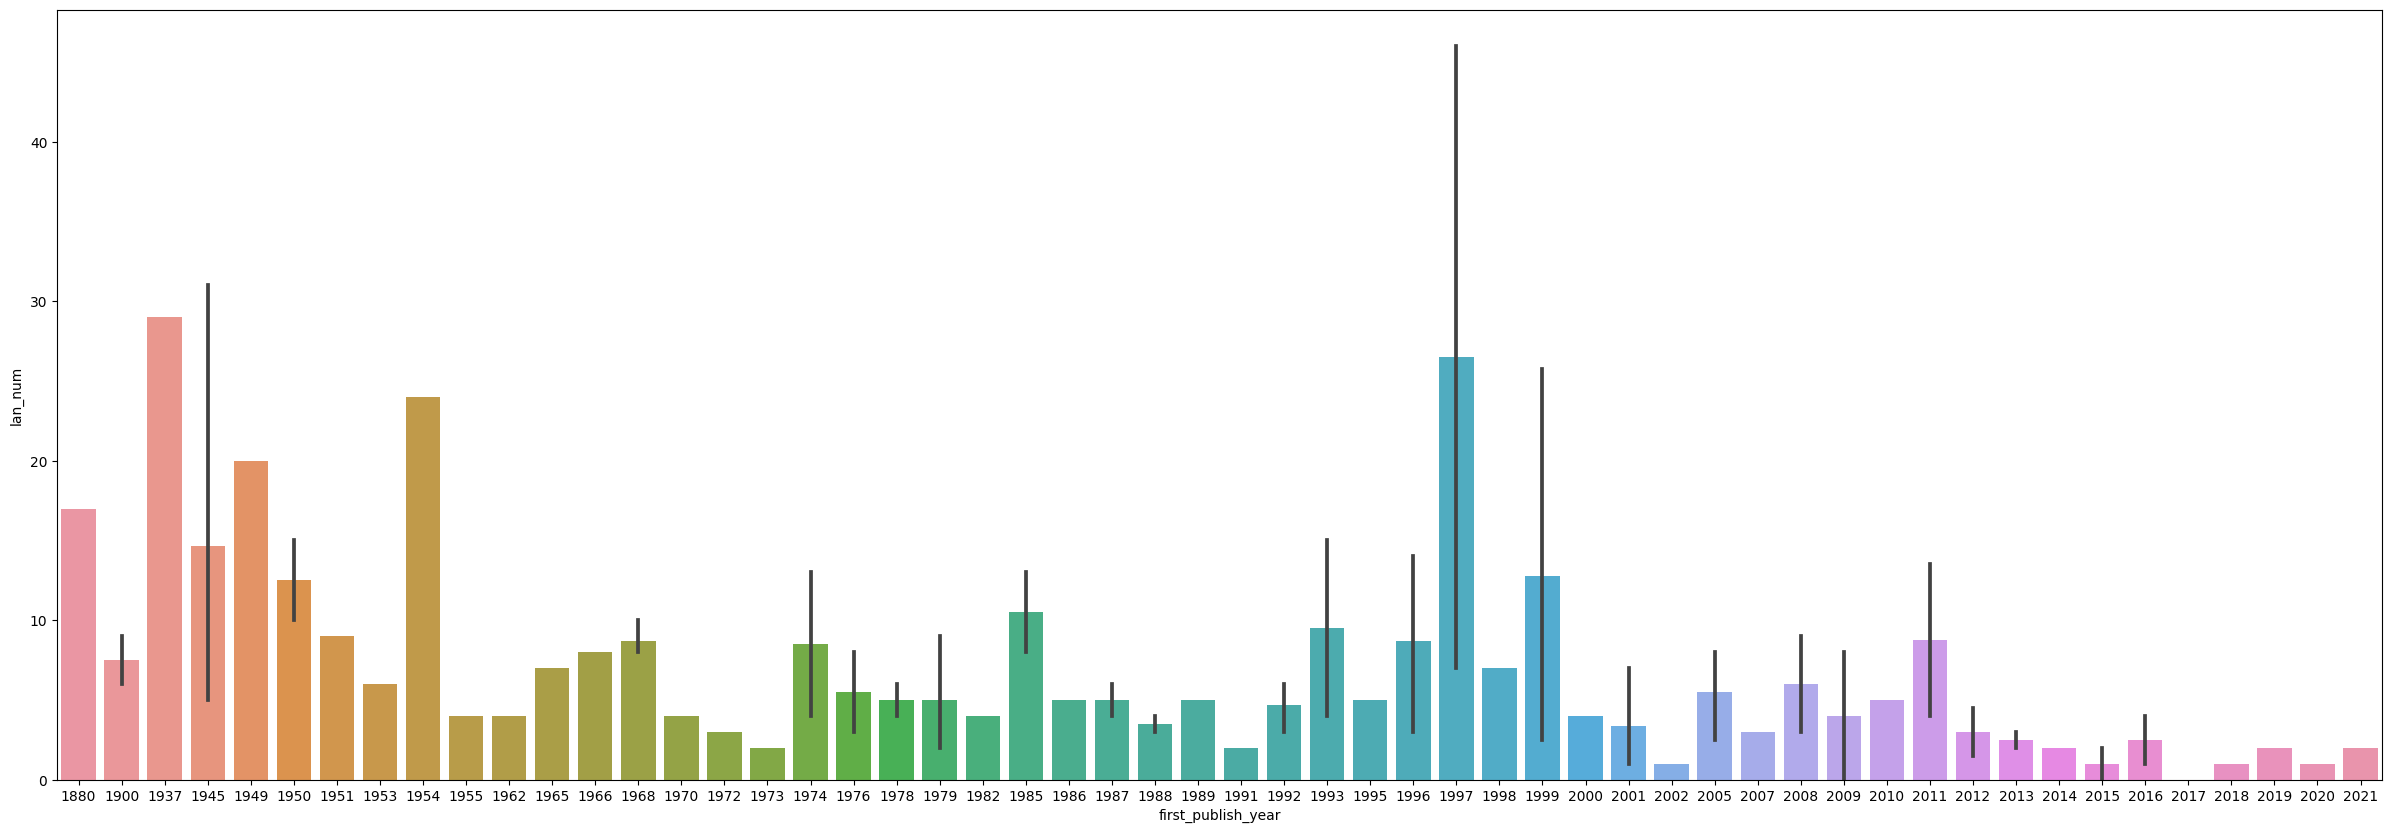

In [114]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.barplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='lan_num', ax=ax)
plt.show()

The first graph shows relative rating of the books over time based on each one's first published year.
The second graph shows the distribution of books on their first published year, and the number of languages they were translated to over the years (the base is in Eng).

What we can conclude is how internationally popular books became throughout time.
Some instances of books written in the genre of scifi in mid 50's late 70s have are highly popular now, and we can see they were standing out among the rest from the same time period.
Books that are written since the mid 2000s til now all have relatively high ranking, which means the genre popularity and standards have increased, but we don't see any major standouts as was the case with books from the 50s and 70s. This could partially be due to oversaturation of the genre, meaning in order for one book to stand out, there's more and tougher competition for it.

The second graph is quite interesting. we see that the number of languages books were translated to were higher upto the 50s. We see that it remained relatively low till the 90's which, according to the previous graph was a peak in popularity of scifi books and so more translations were published (Fun fact, those are the Harry Potter books.)
However, it's interesting to see that as time went on, even though the genre gained popularity, the number of translations decreased and remained low. THis is most likely related to the fact that internet and social networks were on the rise, and people around the globe were learning english, which led to them reading the books in english.

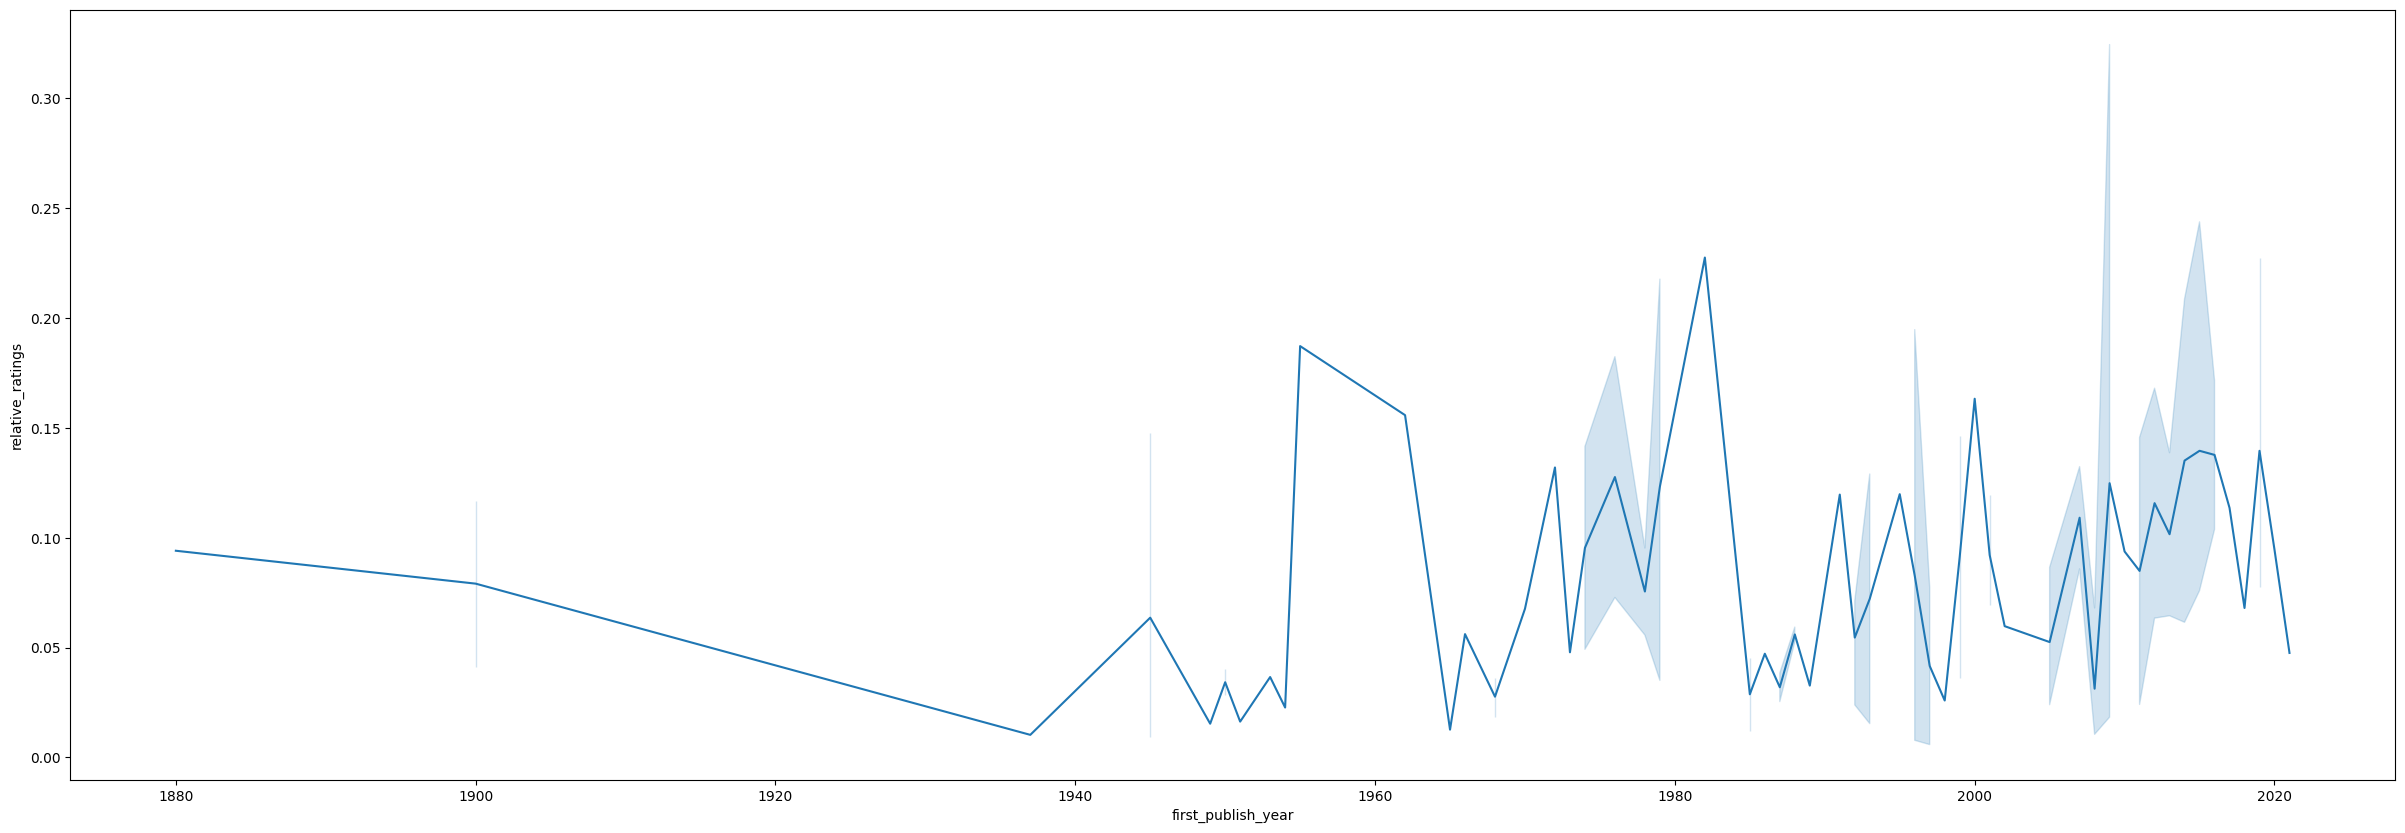

In [115]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.lineplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax)
plt.show()

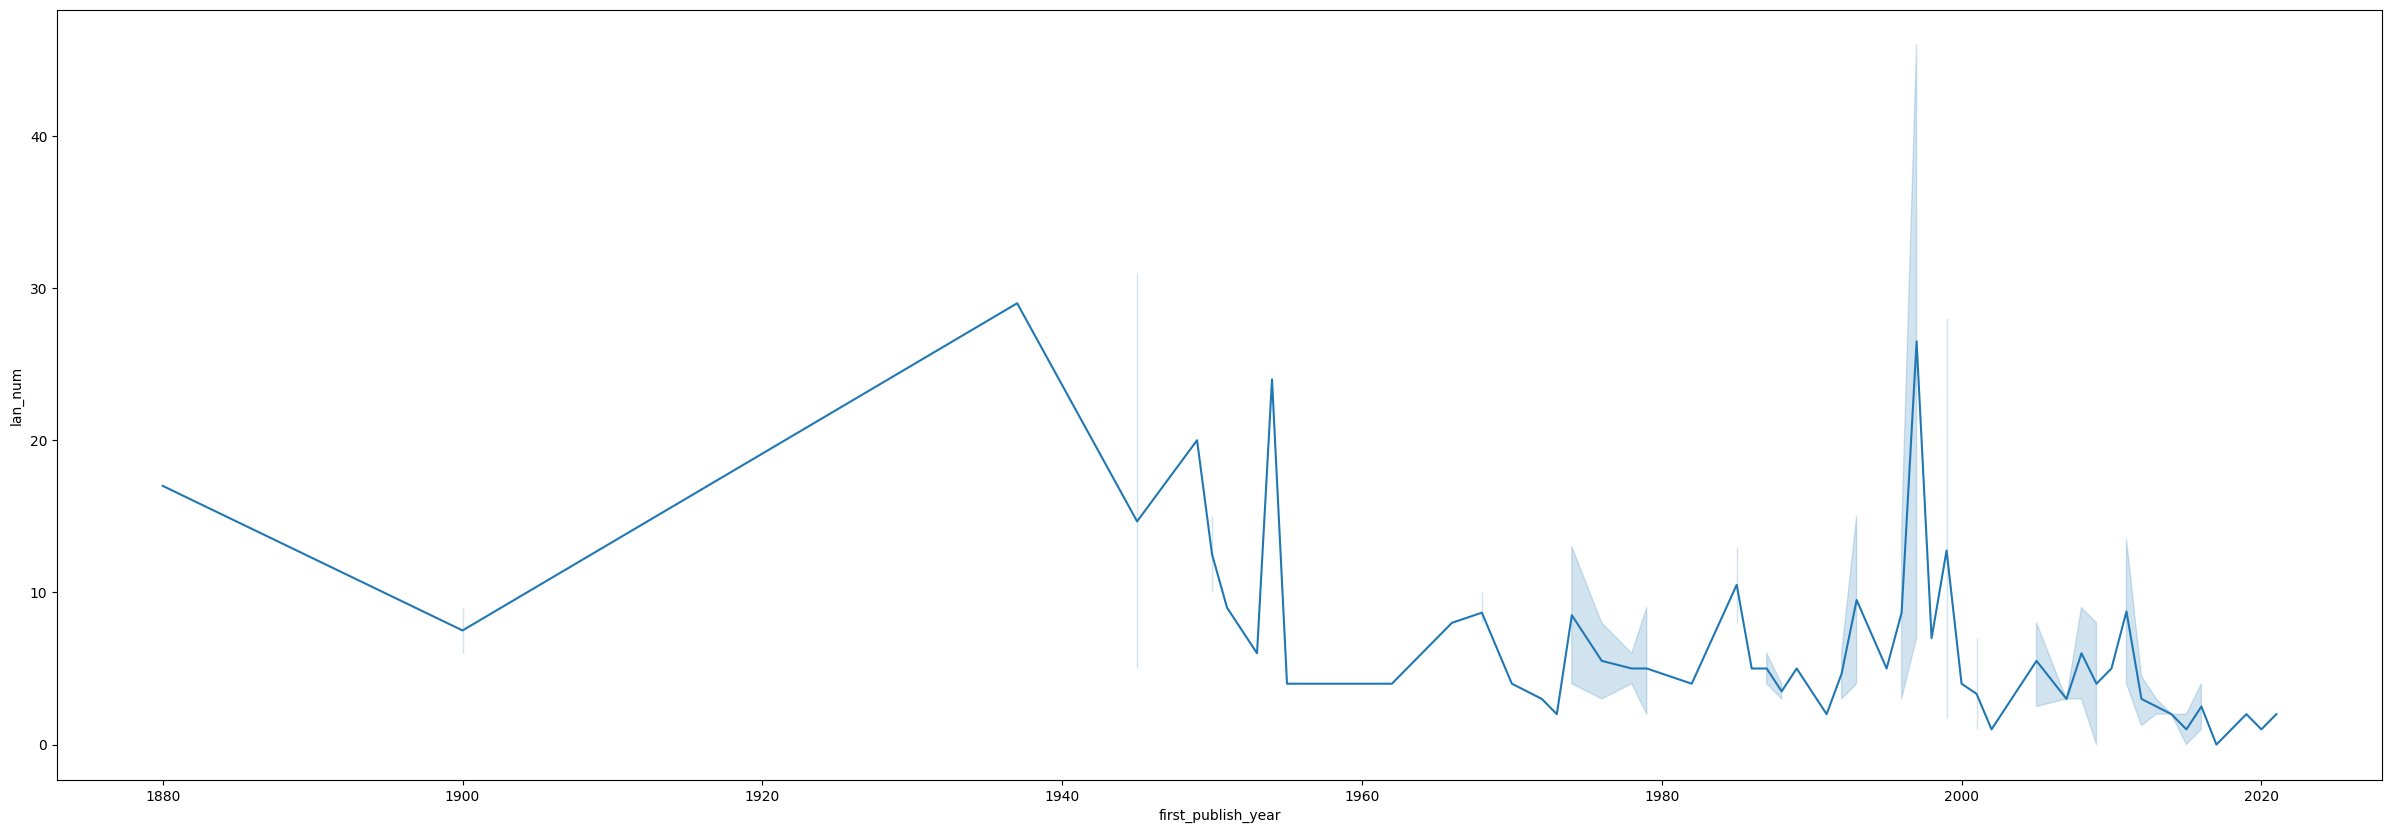

In [116]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.lineplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='lan_num', ax=ax)
plt.show()

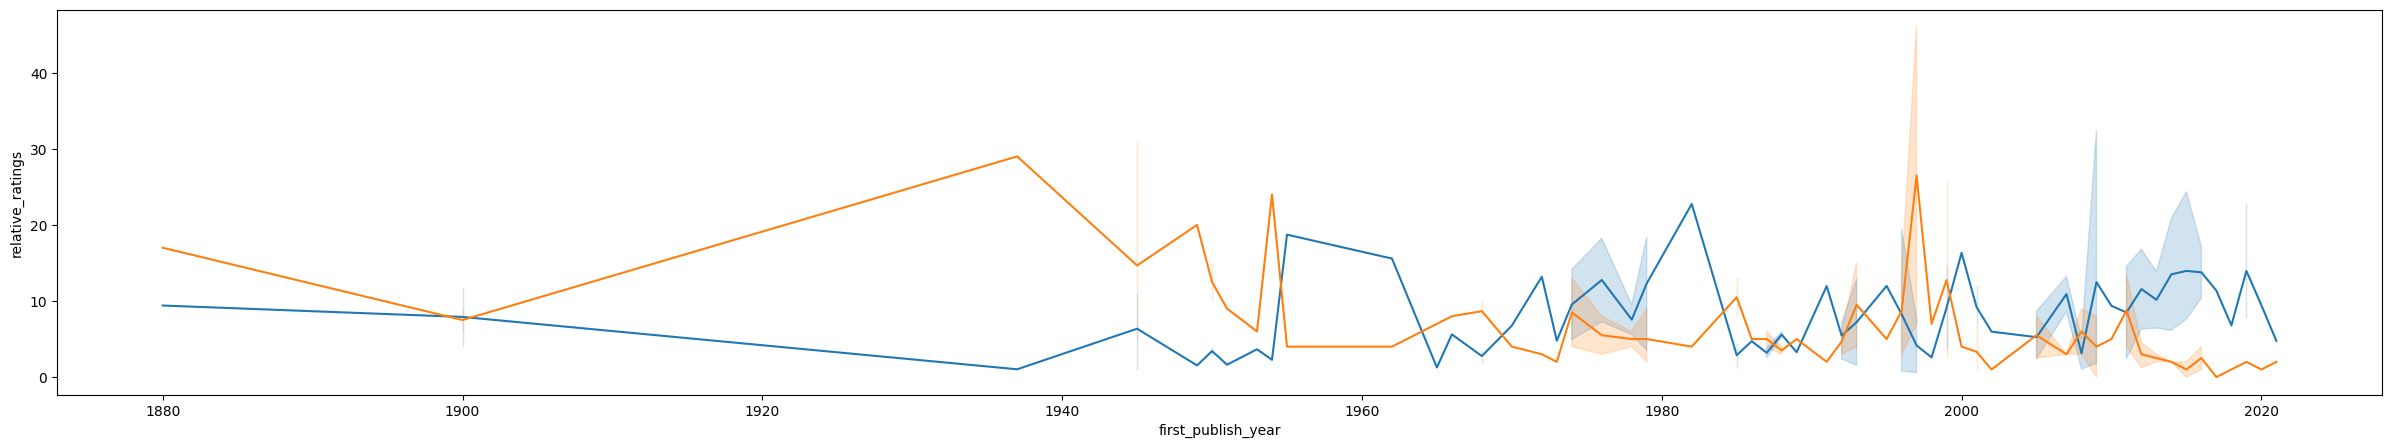

In [117]:
fig, ax = plt.subplots(figsize=(30, 5))

df_top_scifi_sorted['relative_ratings'] = df_top_scifi_sorted['ratings_average']*100/df_top_scifi_sorted['ratings_count']
sns.lineplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax)
sns.lineplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='lan_num', ax=ax)
plt.show()